In [1]:
import pandas as pd
import os


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
files=[file for file in os.listdir("./Sales_Data/")]

In [4]:
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    
    all_months_data=pd.concat([all_months_data,df])

In [5]:
len(all_months_data)

186850

In [6]:
all_months_data.to_csv("all_data.csv",index=False)

In [7]:
all_data=pd.read_csv("all_data.csv")

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
df=df.dropna()

In [9]:
all_data=all_data.dropna()

In [10]:
int(all_data["Order Date"][0][:2])

4

In [11]:
all_data["Month"] = all_data["Order Date"].str[:2]

In [12]:
all_data=all_data[all_data["Month"] != "Or"]

In [13]:
all_data["Month"]=all_data["Month"].astype("int32")

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [15]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])

In [16]:
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [18]:
all_data["Sales"]=all_data["Price Each"]* all_data["Quantity Ordered"]

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [20]:
import matplotlib.pyplot as plt

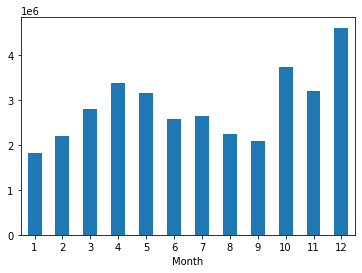

In [21]:
all_data.groupby("Month").sum()["Sales"].plot(kind="bar")

plt.xticks(rotation=0)

plt.show()

In [22]:
all_data.groupby("Month").sum()["Sales"].argmax()+1

12

In [23]:
all_data.groupby("Purchase Address").sum()

,Quantity Ordered,Price Each,Month,Sales
Purchase Address,,,,
"1 11th St, Atlanta, GA 30301",1,11.95,3,11.95
"1 11th St, Los Angeles, CA 90001",1,1700.00,10,1700.00
"1 11th St, San Francisco, CA 94016",1,700.00,9,700.00
"1 12th St, Los Angeles, CA 90001",1,150.00,3,150.00
"1 12th St, New York City, NY 10001",1,11.99,10,11.99
...,...,...,...,...
"999 Wilson St, Atlanta, GA 30301",1,99.99,9,99.99
"999 Wilson St, Los Angeles, CA 90001",1,999.99,9,999.99
"999 Wilson St, New York City, NY 10001",1,150.00,2,150.00


In [70]:
all_data_copy=all_data.copy()

In [76]:
all_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 17.5+ MB


In [24]:
# all_data["City"]=all_data["Purchase Address"].str.split(',').str[1]+' '+all_data["Purchase Address"].str.split(',').str[2].str.split(' ').str[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2][1:3]) 

In [25]:
all_data["City"].unique()

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

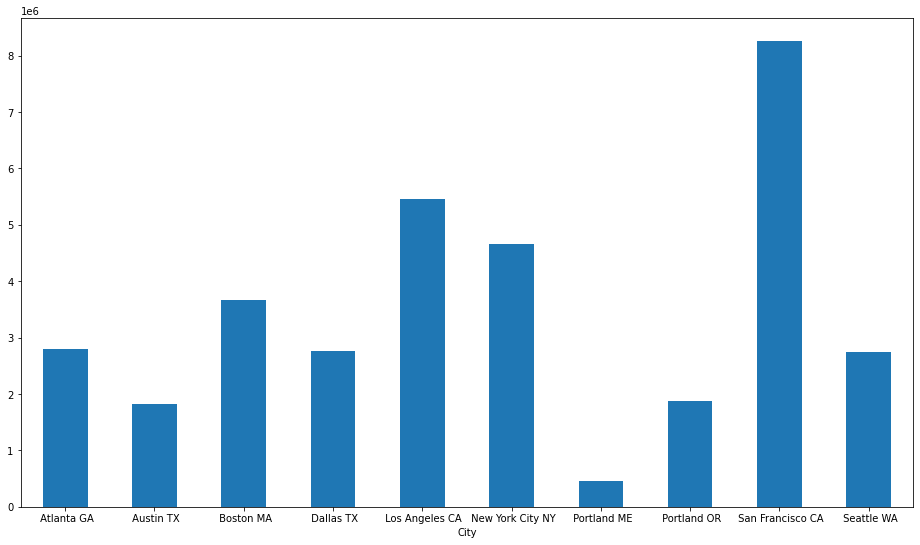

In [26]:
plt.figure(figsize=(16,9))

all_data.groupby("City").sum()["Sales"].plot(kind="bar")

plt.xticks(rotation=0)

plt.show()

In [27]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [29]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


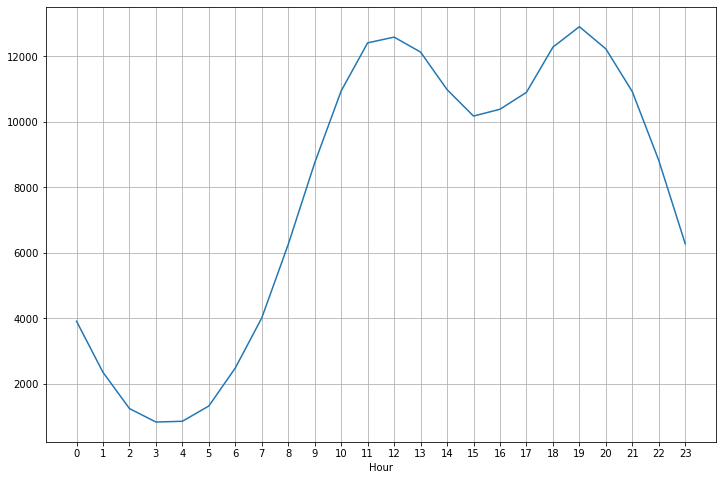

In [30]:
plt.figure(figsize=(12,8))

all_data.groupby("Hour").count()["Quantity Ordered"].plot()
plt.xticks(all_data.groupby("Hour").count().index)
plt.grid()

plt.show()

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [52]:
all_data.groupby("Order ID").count()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Order ID,,,,,,,,,
141234,1,1,1,1,1,1,1,1,1
141235,1,1,1,1,1,1,1,1,1
141236,1,1,1,1,1,1,1,1,1
141237,1,1,1,1,1,1,1,1,1
141238,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
319666,1,1,1,1,1,1,1,1,1
319667,1,1,1,1,1,1,1,1,1
319668,1,1,1,1,1,1,1,1,1


In [59]:
temp_df=all_data[all_data["Order ID"].duplicated(keep=False)]

In [62]:
temp_df["Grouped"]=temp_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [67]:
temp_df=temp_df[["Grouped","Order ID"]].drop_duplicates()
temp_df["Grouped"].value_counts()

iPhone,Lightning Charging Cable                        882
Google Phone,USB-C Charging Cable                      856
iPhone,Wired Headphones                                361
Vareebadd Phone,USB-C Charging Cable                   312
Google Phone,Wired Headphones                          303
                                                      ... 
LG Washing Machine,Apple Airpods Headphones              1
ThinkPad Laptop,LG Dryer                                 1
27in 4K Gaming Monitor,Vareebadd Phone                   1
ThinkPad Laptop,34in Ultrawide Monitor                   1
Google Phone,Wired Headphones,AA Batteries (4-pack)      1
Name: Grouped, Length: 366, dtype: int64

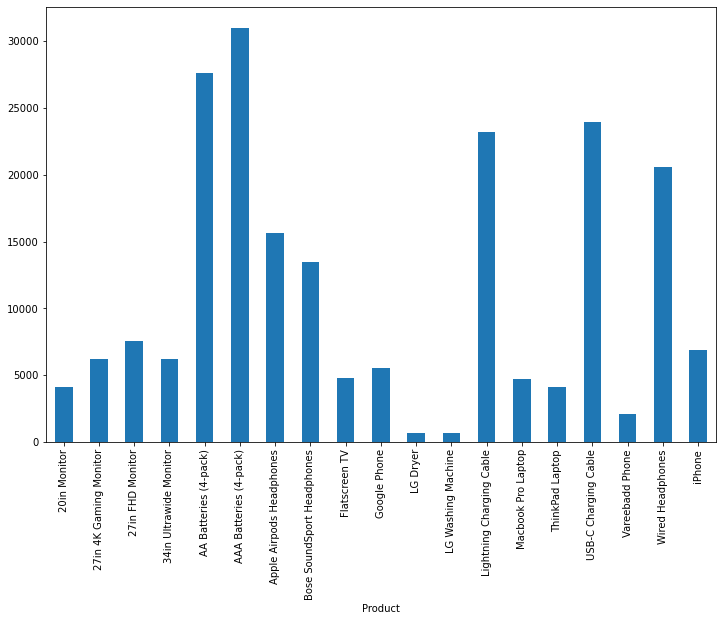

In [80]:
plt.figure(figsize=(12,8))

all_data.groupby("Product").sum()["Quantity Ordered"].plot(kind="bar")

plt.show()

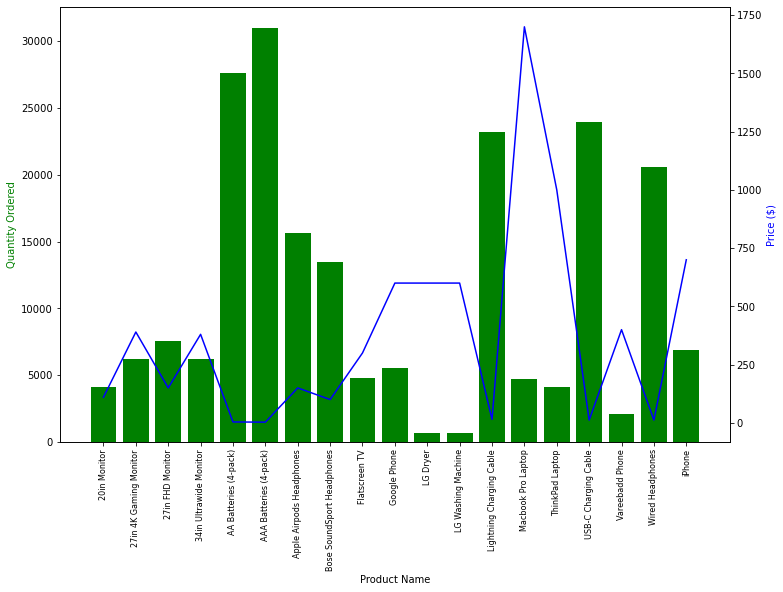

In [82]:

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(12,8))

ax2 = ax1.twinx()
ax1.bar(all_data.groupby('Product').mean()['Price Each'].index, all_data.groupby("Product").sum()["Quantity Ordered"], color='g')
ax2.plot(all_data.groupby('Product').mean()['Price Each'].index, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(all_data.groupby('Product').mean()['Price Each'].index, rotation=90, size=8)

plt.show()